In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('D:\MLProjects\Heart Disease Prediction\heart disease\heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
#printing the five rows where target is equal to 1
df[df.target==1].head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1


In [8]:
#chekcing for the null value's in dataframe
df.isnull().sum().sum()

0

In [9]:
#finding the no pf unique categories in target column
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [10]:
# Percentage of patients have and do not have heart disease
df['target'].value_counts()/df.shape[0]*100 

1    51.317073
0    48.682927
Name: target, dtype: float64

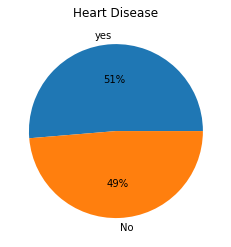

In [13]:
# Create a plot to display the percentage of the positive and negative heart disease 
labels = ['yes', 'No']
values = df['target'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Disease')
plt.show()

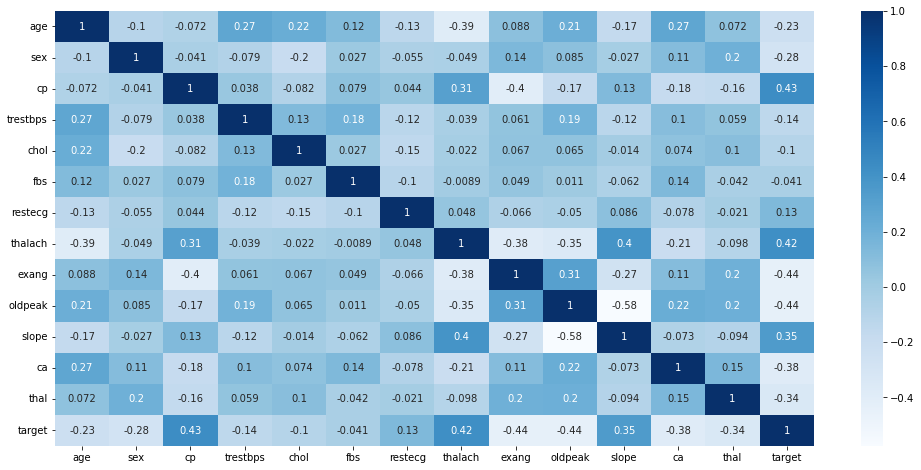

In [21]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

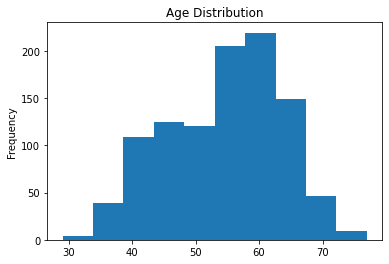

In [24]:
# age distribution
df['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [27]:
# Get min, max and average of the age
print('Min Age: ', min(df['age']))
print('Max Age: ', max(df['age']))
print('Averae Age: ', df['age'].mean())

Min Age:  29
Max Age:  77
Averae Age:  54.43414634146342


In [40]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [45]:
df.sex.value_counts()/df.shape[0]*100 

1    69.560976
0    30.439024
Name: sex, dtype: float64

C:\Users\Bhargav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bhargav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


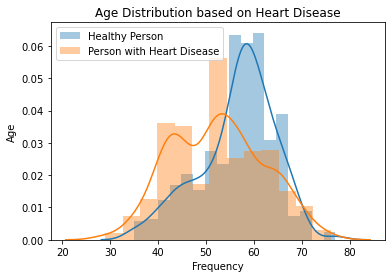

In [39]:
# Display age distribution based on heart disease
sns.distplot(df[df['target'] == 0]['age'], label='Healthy Person')
sns.distplot(df[df['target'] == 1]['age'], label = 'Person with Heart Disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

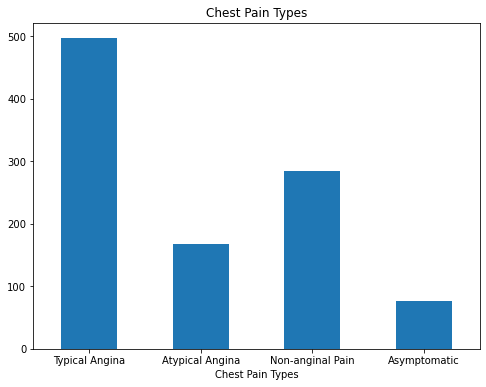

In [47]:
df.groupby(df['cp']).count()['target'].plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))
plt.xlabel('Chest Pain Types')
plt.xticks(np.arange(4), ('Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'), rotation = 0)
plt.show()

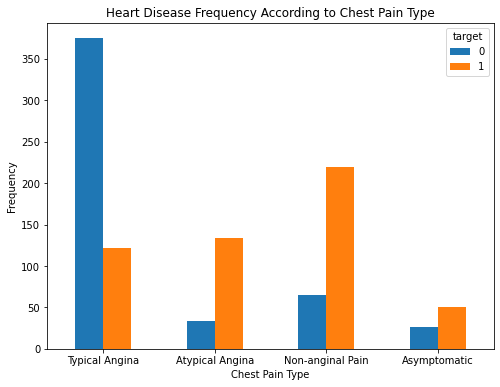

In [49]:
#chest pain with arget column
pd.crosstab(df.cp,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(np.arange(4), ('Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

C:\Users\Bhargav\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


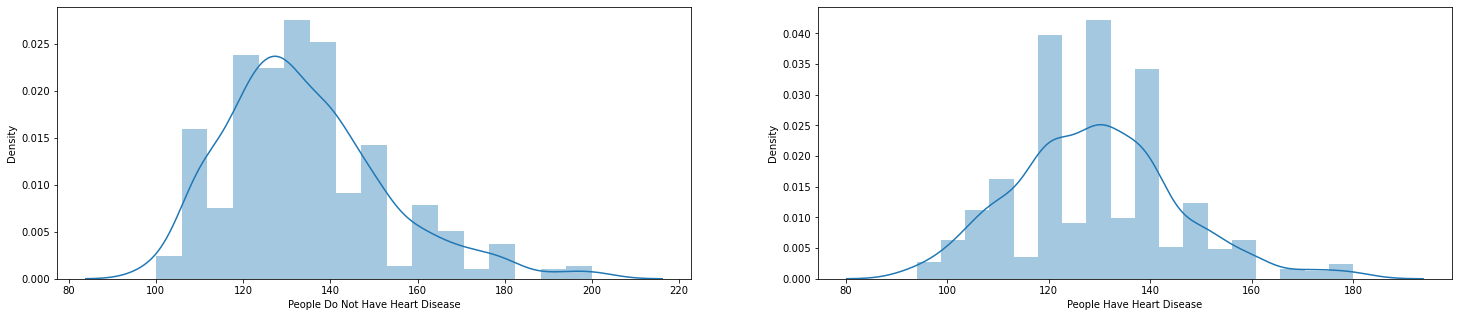

In [52]:
# Display blood pressure distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(df[df['target'] == 0]['trestbps'], label='Healthy Person', ax = axis1)
ax.set(xlabel='People Do Not Have Heart Disease')
ax = sns.distplot(df[df['target'] == 1]['trestbps'], label = 'Person WIth heart disease', ax = axis2)
ax.set(xlabel='People Have Heart Disease')
plt.show()

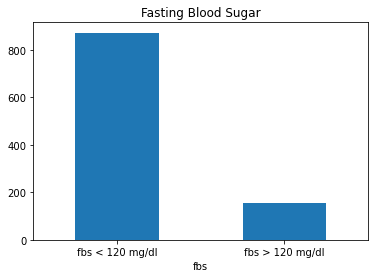

In [54]:
# fasting blood sugar
df.groupby(df['fbs']).count()['target'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (6, 4))
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.show()

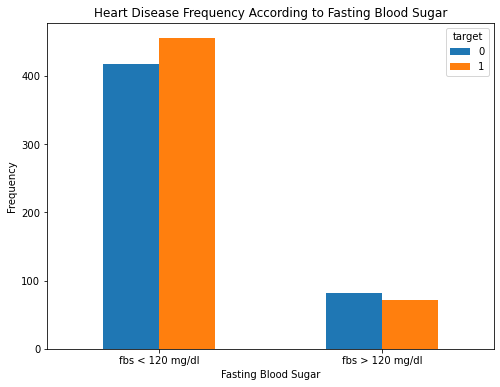

In [55]:
# Display fasting blood sugar based on the target
pd.crosstab(df.fbs,df.target).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
plt.ylabel('Frequency')
plt.show()

# Splitting the data

In [56]:
X = df.drop(['target'], axis = 'columns')
y = df.target

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer, classification_report,confusion_matrix

In [66]:
dtree = DecisionTreeClassifier().fit(X_train,y_train)

In [67]:
from sklearn.metrics import classification_report
testpred= dtree.predict(X_test)
print(classification_report(y_test,testpred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       125
           1       1.00      0.98      0.99       132

    accuracy                           0.99       257
   macro avg       0.99      0.99      0.99       257
weighted avg       0.99      0.99      0.99       257



In [ ]:
#print('the f1 score is', f1_score(y_test,testpred))

# Using cross validation

In [68]:
scores= cross_val_score(dtree, X_train,y_train, cv=5, scoring='f1_macro')
scores.mean()

0.9752806715710687

In [69]:
scores1= cross_val_score(dtree, X_test,y_test, cv=5, scoring='f1_macro')
scores1.mean()

0.8909140159560327

[Text(0.4965, 0.95, 'X[2] <= 0.5\ngini = 0.5\nsamples = 768\nvalue = [374, 394]'),
 Text(0.282, 0.85, 'X[11] <= 0.5\ngini = 0.365\nsamples = 362\nvalue = [275, 87]'),
 Text(0.188, 0.75, 'X[12] <= 2.5\ngini = 0.498\nsamples = 167\nvalue = [89, 78]'),
 Text(0.104, 0.65, 'X[8] <= 0.5\ngini = 0.418\nsamples = 94\nvalue = [28, 66]'),
 Text(0.064, 0.55, 'X[4] <= 316.5\ngini = 0.183\nsamples = 59\nvalue = [6, 53]'),
 Text(0.032, 0.45, 'X[7] <= 96.5\ngini = 0.073\nsamples = 53\nvalue = [2, 51]'),
 Text(0.016, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.048, 0.35, 'gini = 0.0\nsamples = 51\nvalue = [0, 51]'),
 Text(0.096, 0.45, 'X[0] <= 61.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.08, 0.35, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.112, 0.35, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.144, 0.55, 'X[6] <= 0.5\ngini = 0.467\nsamples = 35\nvalue = [22, 13]'),
 Text(0.128, 0.45, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.16, 0.45, 'X[10] <= 1.

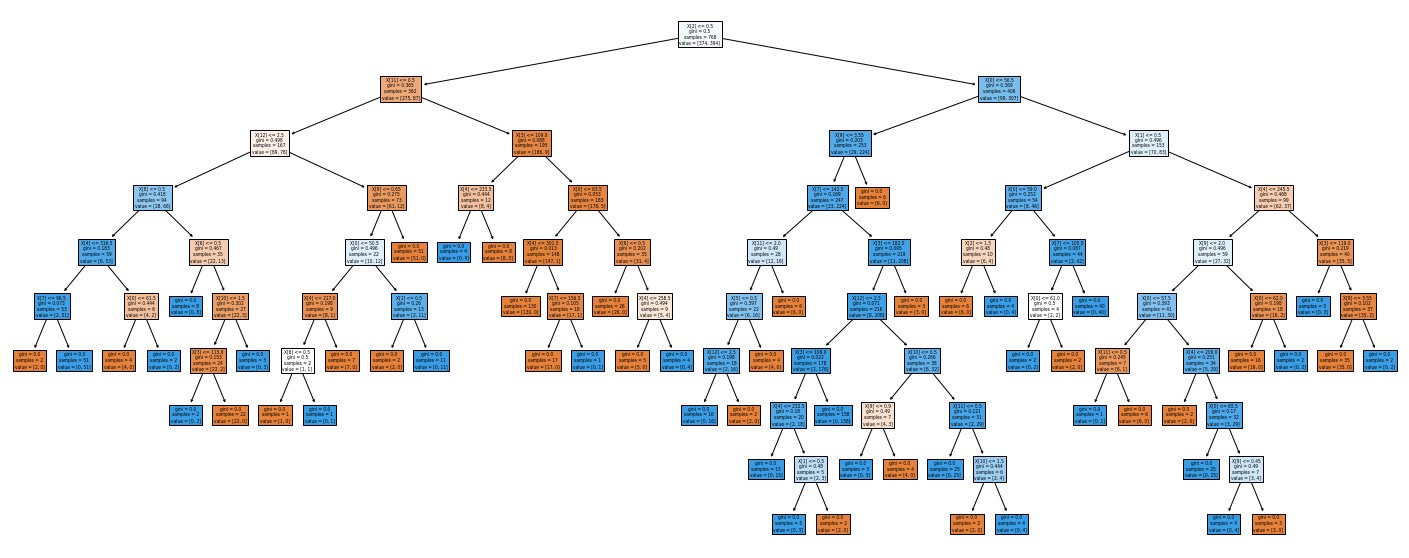

In [70]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
tree.plot_tree(dtree,filled=True)

# Post Prunning

#-When we are constructing a decision tree  its complete depth this leads to overfitting, To prevent overfitting we need to give/find values  to parameters like min_samples_leaf and Max_depth 

In [ ]:
#dir(dtree)

In [71]:
path = dtree.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas, impurities =path.ccp_alphas, path.impurities

In [72]:
dtree1=[]
for ccp_alpha in ccp_alphas:
    dtree=DecisionTreeClassifier(random_state=200, ccp_alpha=ccp_alpha)
    dtree.fit(X_train,y_train)
    dtree1.append(dtree)
#print('Number of nodes in last tree is : {} with ccp_alpha: {}'.format(dtree1[-1].tree_.node_count, ccp_alpha[-1]))

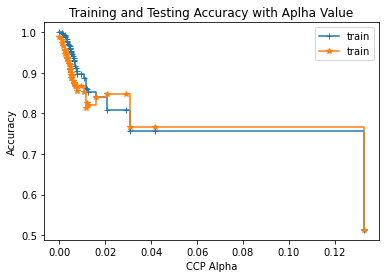

In [73]:
#clfs=dtree1
train_score =[dtree.score(X_train,y_train) for dtree in dtree1]
test_score= [dtree.score(X_test,y_test) for dtree in dtree1]


fig, ax= plt.subplots()
ax.set_xlabel('CCP Alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Testing Accuracy with Aplha Value')
ax.plot(ccp_alphas, train_score, label='train',marker='+' ,drawstyle='steps-post')
ax.plot(ccp_alphas, test_score, label='train',marker='*', drawstyle='steps-post')
ax.legend()
plt.show()

# Finding the best model parameters using randomized_search

In [74]:
parameters = { 'max_depth': (5,6,7,8,9,10,11),
              'criterion': ('gini', 'entropy'),
              'max_features': ('auto','log2','sqrt'),
              'min_samples_split': (1,2,3,4,5,6,7,8,9,10),
              'min_samples_leaf': (1,2,3,4,5,6,7,8,9,10)
}
scorer=make_scorer(f1_score)

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
bestdtree=RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=parameters,cv=5,scoring=scorer) 

In [79]:
bestdtree.fit(X_train,y_train)

C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (5, 6, 7, 8, 9, 10, 11),
                                        'max_features': ('auto', 'log2',
                                                         'sqrt'),
                                        'min_samples_leaf': (1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10),
                                        'min_samples_split': (1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10)})

In [80]:
bestdtree.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [89]:
#now wee found out max_depth 8 is good i guess, lets use these hyperparameters
dtree1= DecisionTreeClassifier(ccp_alpha=0.02,
 class_weight= None,
 criterion='entropy',
 max_depth= 11,
 max_features= 'auto',
 max_leaf_nodes= None,
 min_impurity_decrease= 0.0,
 min_samples_leaf=1,
 min_samples_split= 2,
 min_weight_fraction_leaf= 0.0,
 random_state= None,
 splitter='best')

In [90]:
dtree1.fit(X_train,y_train)

C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(ccp_alpha=0.02, criterion='entropy', max_depth=11,
                       max_features='auto')

In [91]:
dtree1.score(X_train,y_train)

0.859375

In [92]:
from sklearn.metrics import accuracy_score
X_train_pred= dtree1.predict(X_train)
train_acc= accuracy_score(X_train_pred, y_train)
print(train_acc)

0.859375


In [93]:
y_Pred=dtree1.predict(X_test)

In [94]:
print('the F1_score is',f1_score(y_Pred,y_test))

the F1_score is 0.8686131386861314


In [95]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_Pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85       125
           1       0.84      0.90      0.87       132

    accuracy                           0.86       257
   macro avg       0.86      0.86      0.86       257
weighted avg       0.86      0.86      0.86       257



# Making Predictions

In [96]:
input_data = (29,1,2,139,303,1,0,177,1,3.9,1,3,3)

#changing the input data into numpy array
input_data_np= np.asarray(input_data)

#reshape the array as we are predicting for one
input_reshaped = input_data_np.reshape(1,-1)

prediction = dtree1.predict(input_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The Person Doesnt have Heart Disease')
    
else:
    print('The Person Have Heart Disease')
            

[0]
The Person Doesnt have Heart Disease


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [97]:
import pickle 

In [44]:
filename = 'final_model.sav'
pickle.dump(dtree1,open(filename, 'wb'))

In [45]:
#how to load and using saved model
#rb-reading the binary formatted files
loaded_model = pickle.load(open('final_model.sav','rb'))

In [46]:
input_data = (29,1,2,139,303,1,0,177,1,3.9,1,3,3)

#changing the input data into numpy array
input_data_np= np.asarray(input_data)

#reshape the array as we are predicting for one
input_reshaped = input_data_np.reshape(1,-1)

prediction = loaded_model.predict(input_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The Person Doesnt have Heart Disease')
    
else:
    print('The Person Have Heart Disease')

[0]
The Person Doesnt have Heart Disease


C:\Users\Bhargav\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
